# Resampling

- Sampling with and without replacement
- Cross validation and LOOCV 
- Bootstrap (using sampling with replacement)
- Jackknife 
- Permutation resampling 


## Resampling with replacement

## Preliminaries

Our dataset can reflect either a population or sample (it is a function of context) of size N (i.e. the number of observations). In the univariate case, we define X as our dependent variable and x_i is a specific observation in that feature vector. There are various ways to take a sample, e.g. a simple random sample (SRS) of size n, where n < N.

A **population** is the entire group that you want to draw conclusions about.

A **sample** is the specific subset of the population. The size of the sample is always less than the total size of the population.

## Relevant Statistical Formulas (you should all know by now)

| Name | Symbol | Formula   |<p width=10em>Pyhton</p>   |  <p width=35%>description </p>  |  
|  :---  |  :---  |  :---:  |  :----  |  :----  |  
| Mean | $$\mu$$ | $$\mu = 1/N \sum_{i=1}^N x_i$$ | `mu = np.mean(x)` | The population mean is an average of a group characteristic.|  
| Standard deviation (SD) | $$\sigma$$ | $$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^{2}}$$ |  `sd = np.std(x)` | The population standard deviation is the amount of variation or dispersion of a set of values.|  
| Proportion | $$\mu_{\hat{p}}$$ | $$p = \frac{\sum x}{N} = \frac{\text {number of 1s}}{N}$$ | `p = np.mean(x)` | The population proportion is an average of a group characteristic for a binary value.|
| Proportion (SD) | $$\sigma_{\hat{p}}$$ | $$\sigma = \sqrt{p(1-p)}$$  |`sd = np.sqrt(p*(1-p))` |  The dispersion of the feature|
| Degree of freedom | $$df$$ | $$df = N - 1 - k$$  |`df = X.shape[0]-1-X.shape[1]` |  The number of "observations" (pieces of information) in the data that are free to vary when estimating statistical parameters|
 

# Resampling
- The process of selecting a subset(a predetermined number of observations) from a larger population.

1. Probability Sampling is when we choose a sample based on the theory of probability.
1. Non-Probability Sampling is when we choose a sample based on non-random criteria i.e. not every member of the population has a chance of being included (less relevant to our case).

# Types of Probability Resampling (not exhaustive)

- Simple Random Sampling: Samples are drawn with a uniform probability from the domain.
- Stratified Sampling: Samples are drawn within pre-specified categories or factors.


# Aspects to consider when performing sampling

- Sample Goal. What is the metric you wish to estimate using the sample.
- Population. Where are observations sampled or simulated from.
- Selection Criteria. How do you select observations in each sample.
- Sample Size. What is the number of observations that will constitute the sample.
- Sample proportion. What multilevel factors are reflected in the sample


# Let's inject some code to the theory


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
SEED = 2022
N = 50 #observations
rng = np.random.default_rng(SEED)

ModuleNotFoundError: No module named 'seaborn'

## **Random Sampling**: Each element of the population has an equal chance of being selected.
- Each element in the population is equally likely to be selected but only once.


In [24]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

<AxesSubplot:>

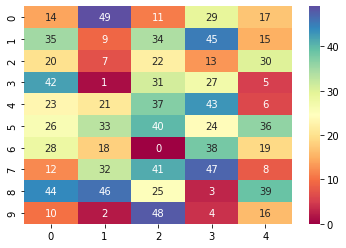

In [23]:
X = np.arange(N)
sample_size = (10, 5) # 10 obs over 5 folds 
subsets = rng.choice(X, sample_size, replace=False)
subsets = pd.DataFrame(subsets)
sns.heatmap(subsets, cmap='Spectral', annot=True ,fmt='d')

#### If data is large 


<AxesSubplot:>

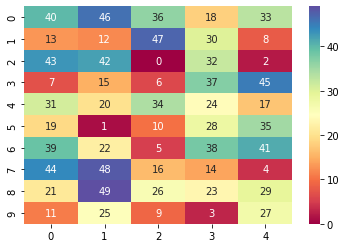

In [28]:
sample_size = (10, 5)
X = np.arange(N)
rng.shuffle(X)
subsets = pd.DataFrame(X.reshape(sample_size))
sns.heatmap(subsets, cmap='Spectral', annot=True ,fmt='d')

### **With replacement**: 
- All elements of a population have an equal chance of being selected more than once - n can be larger than N in this example. 

<AxesSubplot:>

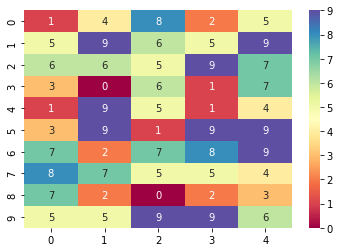

In [12]:
X = np.arange(10)
sample_size = (10, 5) # 20 obs over 5 folds 
subsets = rng.choice(X, sample_size, replace=True)
subsets = pd.DataFrame(subsets)
sns.heatmap(subsets, cmap='Spectral', annot=True ,fmt='d')

## Stratified Sampling
Samples are drawn within pre-specified categories or factors.
1. We group the entire population into subpopulations by some common property.
1. We then randomly sample from those groups individually, such that the groups are still maintained in the same ratio. 

<AxesSubplot:>

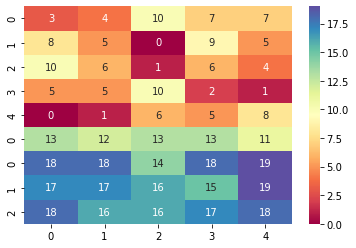

In [18]:
N = 20
X = np.arange(N)
ratio, groups = (0.55, 0.15, 0.3), [0, 1, 2]
Y = np.repeat(groups, (np.array(ratio)*N).astype(int))
folds, sample_size = 5, 10
subset_size = np.array(ratio)*sample_size
dummy = np.eye(len(groups))[Y]
subsets = []
for i, k in enumerate(subset_size):
    _X = X[np.where(dummy[:, i] == 1)[0]]
    subsets.append(pd.DataFrame(rng.choice(_X, (int(k), folds))))
subsets = pd.concat(subsets)
sns.heatmap(subsets, cmap='Spectral', annot=True ,fmt='d')

# Why are we resampling? 
- Resampling is intended to approximate the variability of some target metrics given some empirical conditions.
- This, in turn, gives us the ability to conduct an empirical comparison within the limitations of our dataset.
- It also allows us to augment our data in different forms (e.g. to handle imbalanced data or to introduce some heuristics to increase heterogeneity of the dataset)

# Cross-Validation
A crucial part of machine learning is training the model. A model is created based on a set of data called the training set. 
We then demonstrate the accuracy of the model on an unseen subset of the data, which is often referred to as a test or validation set. 
Multiplication of independent subsets of training and, therefore, multiple models are extremely beneficial for many reasons. Each of these splits, however, may limit our model's ability to learn a precise representation of the problem. This is sometimes a required feature of our learning pipeline (e.g. fitting age-band specific models as part of an ensemble learning algorithm). Generally, however, we will make use of all of our data (since it is very expensive to acquire).  
Unless manually constrained, models will grow in complexity in an attempt (often futile) to explain every data point. Usually, this kind of behaviour is called overfitting, and it can often be found in situations (at least in our field) when you have more observations than features (aka the "curse of dimensionality" or large P, small N, (P >> N)).
Generally, this means our model will be very good at predicting known situations, but it will struggle to generalize.
Using an iterative split and reporting mean performance over different iterations is one method of evaluating ML performance with minimal data sacrifice, as demonstrated last week. You may also look at the predictions we can make from unseen data. This process is called cross validation, i.e. learn from the training subset and test on the validation subset.  

# Data Subset

When selecting a model, we distinguish 3 different parts of the data that we have as follows:
- Training set (usualy 75-90% of the data) on which the model is trained
- Validation set (usualy 25-10% of the data) on which the model is assessed (Also called hold-out or development set)
- Testing set - the unseen data on which the perfomance of the model is reported

# Common types of CV
Two types of cross-validation can be distinguished: 
- Exhaustive 
- Non-exhaustive 

# Exhaustive CV
 methods which learn and test on all possible ways to divide the original sample into a training and a validation set.

## Leave-p-out cross-validation
- Creates all the possible training/test sets by removing p samples from the complete set. For n samples, this produces n over p train-test pairs. 
- Let's view this visually 
- For example take 20/80% split 

Text(82.5, 0.5, 'Number of observations')

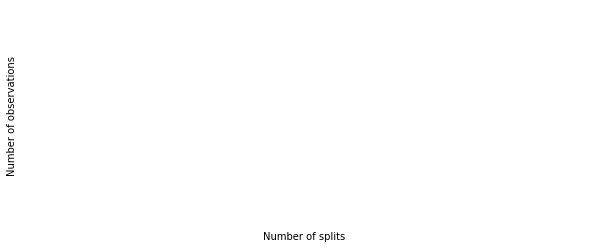

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeavePOut

fig,ax = plt.subplots(figsize=(10,4))
params = {"xticklabels" : 0,
          "yticklabels" : 0,
          "annot": False,
          "cbar": False,
          "linewidths" : 1,
          'cmap': 'Paired'}
Leave_p, N = 0.2, 10
N_test = int(N*Leave_p)
Y = np.ones(N)
lpo=LeavePOut(N_test)
data = []
for i, (train, test) in enumerate(lpo.split(Y)):
    tmp = np.ones(N)
    tmp[test]=0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data).T,  ax=ax, **params)
ax.set_xlabel('Number of splits')
ax.set_ylabel('Number of observations')

- Due to the high number of iterations which grows combinatorially with the number of samples this cross-validation method can be very costly.

## Leave-one-out cross-validation
Leave-one-out cross-validation (LOOCV) is a particular case of leave-p-out cross-validation with p = 1.


Text(82.5, 0.5, 'Number of observations')

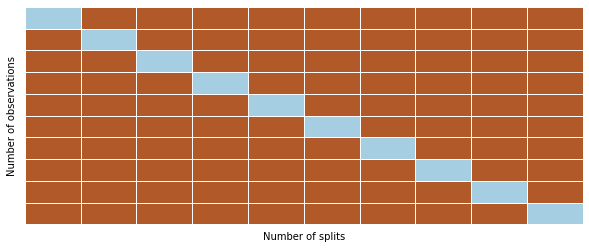

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
Y = np.ones(N)
lpo = LeavePOut(1)
data = []
for i, (train, test) in enumerate(lpo.split(Y)):
    tmp = np.ones(N)
    tmp[test] = 0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data).T,  ax=ax, **params)
ax.set_xlabel('Number of splits')
ax.set_ylabel('Number of observations')

# Non-exhaustive CV
Methods which learn and test on a subset (often overlapping) of all possible ways to divide the original sample (we are approximating the performance using some assumptions).

## Holdout method
- We randomly assign data points to two sets d0 and d1, usually referred to as training and testing sets. Usually, the test set is smaller than the training set, but it's not set in stone. Training (building a model) on d0, testing (evaluating it) on d1.
- Cross-validation typically involves averaging the results of several model-testing runs; by contrast, holdout involves only a single run. In fact, if the multiple runs are not averaged, you may achieve highly misinforming results without such averaging. 

<AxesSubplot:>

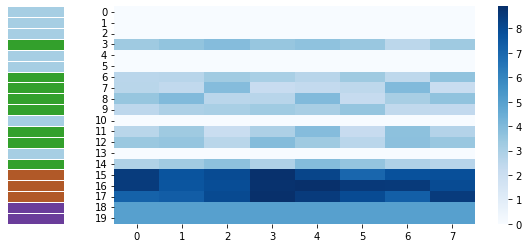

In [47]:
from sklearn.model_selection import train_test_split
N = 20

Y = rng.choice([0, 1], p=(0.35, 0.65), size=(N, 1))
X = rng.uniform(1,2,size=(N, 8))*2*Y
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=2022)

fig, ax = plt.subplots(1, 2, figsize=(
    10, 4), gridspec_kw={'width_ratios': [1, 8]})
params['cmap'] = 'Paired'
sns.heatmap(pd.DataFrame(np.vstack([y_train,(y_test+3)])),  ax=ax[0], **params)
sns.heatmap(pd.DataFrame(np.vstack([X_train,(X_test+5)])),  ax=ax[1], cmap='Blues')

## K-Fold 
- Split the dataset into k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). 
- The prediction function is learned using  folds, and the fold left out is used for test.


Text(0.5, 28.5, 'Number of observations')

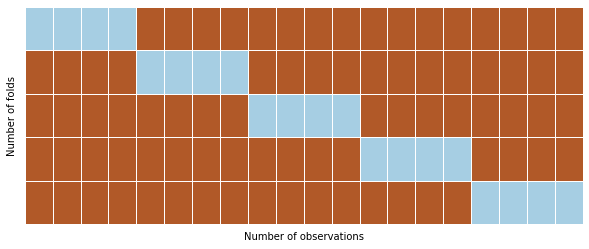

In [48]:
from sklearn.model_selection import KFold
fig, ax = plt.subplots(figsize=(10, 4))
Y = np.ones(N)
kf = KFold(5)
data = []
for i, (train, test) in enumerate(kf.split(Y)):
    tmp = np.ones(N)
    tmp[test] = 0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data),  ax=ax, **params)
ax.set_ylabel('Number of folds')
ax.set_xlabel('Number of observations')


## Stratified k-fold
- Stratified k-fold is a variation of k-fold which returns stratified folds. 
- each set contains approximately the same ratio of samples of each target class as the complete set.


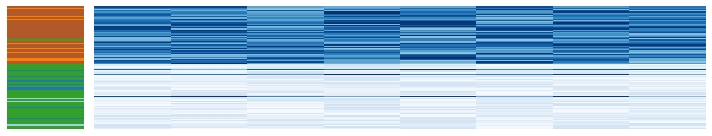

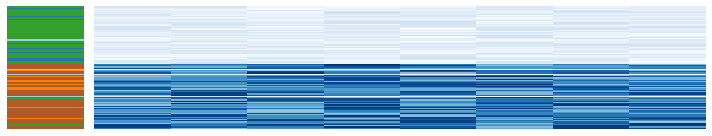

In [49]:
from sklearn.model_selection import StratifiedKFold
N = 100
X = rng.uniform(1, 2, size=(N, 8))
Y = rng.choice([1, 2, 3], p=(0.10, 0.25, 0.65), size=(N, 1))
K = 2
skf = StratifiedKFold(K)
params["linewidths"]=0
data = []
for i, (train, test) in enumerate(skf.split(X, Y)):
    fig, ax = plt.subplots(1, 2, figsize=(
        10, 2), gridspec_kw={'width_ratios': [1, 8]})
    C = np.ones((N, 1))
    C[train] = 0
    params['cmap'] = 'Paired'
    sns.heatmap(pd.DataFrame(Y+Y*C*2),  ax=ax[0], **params)
    params['cmap'] = 'Blues'
    sns.heatmap(pd.DataFrame(X+X*C*2),  ax=ax[1], **params)
    plt.tight_layout()

## Comparing models using a pipeline 





In [35]:
from sklearn.datasets import load_diabetes
from IPython.display import display,Markdown
diabetes = load_diabetes()
X = pd.DataFrame(diabetes['data'],columns= diabetes['feature_names'])
y = pd.Series(diabetes['target'])
display(Markdown(diabetes['DESCR']))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,median_absolute_error
def calc_error(y,y_hat,i=None,kind='model'):
    err = {'Kind':kind,
            'MAE':mean_absolute_error(y,y_hat),
            'MSE':mean_squared_error(y,y_hat),
            'MAD':median_absolute_error(y,y_hat),
            'RMSE':mean_squared_error(y,y_hat,squared=False),
            'r2':r2_score(y,y_hat)}
    return pd.DataFrame(err,index=[i])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=2022)
# Linear Regression Pipeline
lr_pipe = Pipeline([('mdl',LinearRegression())])
lr_pipe.fit(X_train, Y_train)
y_hat = lr_pipe.predict(X_test)

display(calc_error(Y_test,y_hat))


,Kind,MAE,MSE,MAD,RMSE,r2
None,model,44.145585,2911.802823,38.222455,53.961123,0.520596


In [11]:

lr_pipe = Pipeline([('scl', StandardScaler()),
                    ('poly_expansion', PolynomialFeatures(2)),                                     
                    ('mdl',LinearRegression())])
lr_pipe.fit(X_train, Y_train)
y_hat = lr_pipe.predict(X_test)

display(calc_error(Y_test,y_hat))


,Kind,MAE,MSE,MAD,RMSE,r2
None,model,43.383252,3315.424821,33.361328,57.579726,0.454143


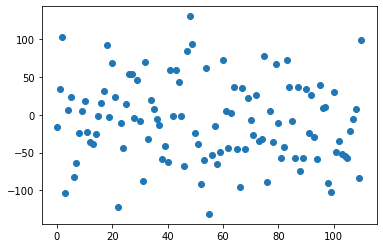

In [40]:
residual = Y_test - y_hat
plt.scatter(np.arange(residual.shape[0]),residual)

In [41]:

lr_pipe = Pipeline([('scl', StandardScaler()),
                    ('reduce_dim', PCA(4)),                                     
                    ('mdl',LinearRegression())])
lr_pipe.fit(X_train, Y_train)
y_hat = lr_pipe.predict(X_test)

display(calc_error(Y_test,y_hat))


,Kind,MAE,MSE,MAD,RMSE,r2
None,model,44.880766,2889.91989,37.997576,53.757975,0.524199


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('scaler', StandardScaler()),
          ('reduce_dim', 'passthrough'),                                     
          ('poly_expansion', 'passthrough'),
          ('mdl',LinearRegression())])

param_grid = dict(
    scaler = [StandardScaler(),PowerTransformer()],
    reduce_dim=['passthrough', PCA(5)],
    poly_expansion = ['passthrough', PolynomialFeatures(2)],
    mdl = [LinearRegression(),DecisionTreeRegressor(),
           SVR(C=100),SVR(C=1000)]
)
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(X_train, Y_train)

In [43]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl,param_poly_expansion,param_reduce_dim,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005297,0.000942,0.001844,0.000523,LinearRegression(),passthrough,passthrough,StandardScaler(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.469886,0.414581,0.492662,0.512901,0.388028,0.455612,0.047137,1
2,0.006388,0.001565,0.002252,0.000651,LinearRegression(),passthrough,PCA(n_components=5),StandardScaler(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.500157,0.417215,0.459713,0.544992,0.346969,0.453809,0.068193,2
3,0.029924,0.005845,0.002475,0.000387,LinearRegression(),passthrough,PCA(n_components=5),PowerTransformer(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.483130,0.406608,0.452395,0.539718,0.350204,0.446411,0.064700,3
1,0.038073,0.011869,0.004389,0.002446,LinearRegression(),passthrough,passthrough,PowerTransformer(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.439101,0.391590,0.493332,0.507906,0.378505,0.442087,0.052076,4
6,0.006284,0.000768,0.002452,0.000276,LinearRegression(),PolynomialFeatures(),PCA(n_components=5),StandardScaler(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.523651,0.368110,0.454491,0.531652,0.328744,0.441330,0.081418,5
7,0.033421,0.001978,0.002939,0.000387,LinearRegression(),PolynomialFeatures(),PCA(n_components=5),PowerTransformer(),"{'mdl': LinearRegression(), 'poly_expansion': ...",0.525636,0.364419,0.446595,0.534919,0.325334,0.439381,0.083959,6
18,0.009736,0.000614,0.004000,0.000220,SVR(C=100),passthrough,PCA(n_components=5),StandardScaler(),"{'mdl': SVR(C=100), 'poly_expansion': 'passthr...",0.518726,0.437114,0.434417,0.504068,0.287560,0.436377,0.081871,7
16,0.009666,0.000266,0.004268,0.000381,SVR(C=100),passthrough,passthrough,StandardScaler(),"{'mdl': SVR(C=100), 'poly_expansion': 'passthr...",0.524250,0.422386,0.491429,0.426068,0.301601,0.433147,0.076376,8
19,0.031136,0.001707,0.004613,0.000217,SVR(C=100),passthrough,PCA(n_components=5),PowerTransformer(),"{'mdl': SVR(C=100), 'poly_expansion': 'passthr...",0.482814,0.419219,0.421437,0.522806,0.289662,0.427188,0.079053,9
17,0.030605,0.001148,0.004910,0.000359,SVR(C=100),passthrough,passthrough,PowerTransformer(),"{'mdl': SVR(C=100), 'poly_expansion': 'passthr...",0.491992,0.408773,0.477814,0.430682,0.282593,0.418371,0.074341,10


In [44]:
best_pipe = grid_search.best_estimator_


display(calc_error(Y_test,best_pipe.predict(X_test)))

,Kind,MAE,MSE,MAD,RMSE,r2
None,model,44.145585,2911.802823,38.222455,53.961123,0.520596


In [19]:
y_hat = best_pipe.predict(X_test)
residual = pd.Series(Y_test-y_hat)

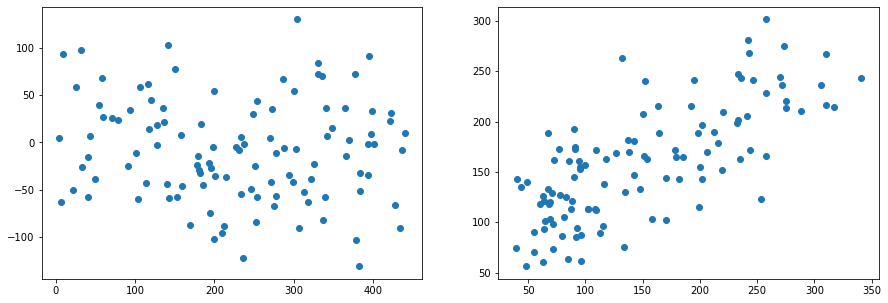

In [21]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(residual.index,residual)
ax[1].scatter(Y_test,y_hat)